In [54]:
import json
import numpy as np
import pandas as pd
import time

In [55]:
df = pd.read_csv("in-district-distributions.csv")
df.head(10)

,Index,Name,District,Total Amount,In-District,Out-of-District
0,1,John A Yarmuth (D)*,Kentucky District 03,"$391,304",79%,21%
1,2,Mark Desaulnier (D)*,California District 11,"$187,226",79%,21%
2,3,Salud Carbajal (D)*,California District 24,"$1,814,726",78%,22%
3,4,Paul Tonko (D)*,New York District 20,"$329,433",75%,25%
4,5,Jodey Arrington (R)*,Texas District 19,"$815,214",75%,25%
5,6,Louis B Gohmert Jr. (R)*,Texas District 01,"$645,960",73%,27%
6,7,Mike Johnson (R)*,Louisiana District 04,"$691,099",73%,27%
7,8,Bill Posey (R)*,Florida District 08,"$515,446",73%,27%
8,9,Jim Himes (D)*,Connecticut District 04,"$796,048",71%,29%
9,10,Jim Banks (R)*,Indiana District 03,"$346,528",70%,30%


In [56]:
df = df.drop(columns = ['Index'])
df.head(10)

,Name,District,Total Amount,In-District,Out-of-District
0,John A Yarmuth (D)*,Kentucky District 03,"$391,304",79%,21%
1,Mark Desaulnier (D)*,California District 11,"$187,226",79%,21%
2,Salud Carbajal (D)*,California District 24,"$1,814,726",78%,22%
3,Paul Tonko (D)*,New York District 20,"$329,433",75%,25%
4,Jodey Arrington (R)*,Texas District 19,"$815,214",75%,25%
5,Louis B Gohmert Jr. (R)*,Texas District 01,"$645,960",73%,27%
6,Mike Johnson (R)*,Louisiana District 04,"$691,099",73%,27%
7,Bill Posey (R)*,Florida District 08,"$515,446",73%,27%
8,Jim Himes (D)*,Connecticut District 04,"$796,048",71%,29%
9,Jim Banks (R)*,Indiana District 03,"$346,528",70%,30%


In [57]:
def convert_percent(percent):
    return float(percent.replace('%', ''))

In [58]:
for index, row in df.iterrows():
    df.at[index, 'In-District'] = convert_percent(df.at[index, 'In-District'])
    df.at[index, 'Out-of-District'] = convert_percent(df.at[index, 'Out-of-District'])
df.head(10)

,Name,District,Total Amount,In-District,Out-of-District
0,John A Yarmuth (D)*,Kentucky District 03,"$391,304",79,21
1,Mark Desaulnier (D)*,California District 11,"$187,226",79,21
2,Salud Carbajal (D)*,California District 24,"$1,814,726",78,22
3,Paul Tonko (D)*,New York District 20,"$329,433",75,25
4,Jodey Arrington (R)*,Texas District 19,"$815,214",75,25
5,Louis B Gohmert Jr. (R)*,Texas District 01,"$645,960",73,27
6,Mike Johnson (R)*,Louisiana District 04,"$691,099",73,27
7,Bill Posey (R)*,Florida District 08,"$515,446",73,27
8,Jim Himes (D)*,Connecticut District 04,"$796,048",71,29
9,Jim Banks (R)*,Indiana District 03,"$346,528",70,30


In [59]:
us_state_abbrev = {'Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR',
                   'California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE',
                   'District of Columbia': 'DC','Florida': 'FL','Georgia': 'GA','Guam': 'GU','Hawaii': 'HI',
                   'Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY',
                   'Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI',
                   'Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE',
                   'Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY',
                   'North Carolina': 'NC','North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH',
                   'Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI',
                   'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT',
                   'Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV',
                   'Wisconsin': 'WI','Wyoming': 'WY'}

In [60]:
def convert_district(district):
    district = district.replace('District ', '')
    return us_state_abbrev[district[:-3]] + district[-2:]

In [61]:
for index, row in df.iterrows():
    df.at[index, 'District'] = convert_district(df.at[index, 'District'])
df.head(10)

,Name,District,Total Amount,In-District,Out-of-District
0,John A Yarmuth (D)*,KY03,"$391,304",79,21
1,Mark Desaulnier (D)*,CA11,"$187,226",79,21
2,Salud Carbajal (D)*,CA24,"$1,814,726",78,22
3,Paul Tonko (D)*,NY20,"$329,433",75,25
4,Jodey Arrington (R)*,TX19,"$815,214",75,25
5,Louis B Gohmert Jr. (R)*,TX01,"$645,960",73,27
6,Mike Johnson (R)*,LA04,"$691,099",73,27
7,Bill Posey (R)*,FL08,"$515,446",73,27
8,Jim Himes (D)*,CT04,"$796,048",71,29
9,Jim Banks (R)*,IN03,"$346,528",70,30


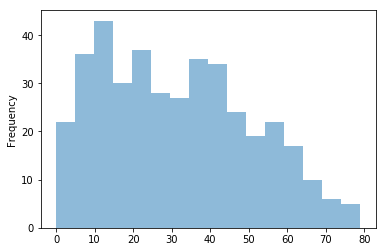

In [62]:
ax = df['In-District'].plot.hist(bins=16, alpha=0.5)
ax

In [63]:
df["Bin"] = ""
for index, row in df.iterrows():
    if row['In-District'] < 5:
        df.at[index, 'Bin'] = '<5%'
    elif row['In-District'] < 10:
        df.at[index, 'Bin'] = '<10%'
    elif row['In-District'] < 15:
        df.at[index, 'Bin'] = '<15%'
    elif row['In-District'] < 20:
        df.at[index, 'Bin'] = '<20%'
    elif row['In-District'] < 25:
        df.at[index, 'Bin'] = '<25%'
    elif row['In-District'] < 30:
        df.at[index, 'Bin'] = '<30%'
    elif row['In-District'] < 35:
        df.at[index, 'Bin'] = '<35%'
    elif row['In-District'] < 40:
        df.at[index, 'Bin'] = '<40%'
    elif row['In-District'] < 45:
        df.at[index, 'Bin'] = '<45%'
    elif row['In-District'] < 50:
        df.at[index, 'Bin'] = '<50%'
    elif row['In-District'] < 55:
        df.at[index, 'Bin'] = '<55%'
    elif row['In-District'] < 60:
        df.at[index, 'Bin'] = '<60%'
    elif row['In-District'] < 65:
        df.at[index, 'Bin'] = '<65%'
    elif row['In-District'] < 70:
        df.at[index, 'Bin'] = '<70%'
    elif row['In-District'] < 75:
        df.at[index, 'Bin'] = '<75%'
    elif row['In-District'] < 80:
        df.at[index, 'Bin'] = '<80%'
df.head(10)

,Name,District,Total Amount,In-District,Out-of-District,Bin
0,John A Yarmuth (D)*,KY03,"$391,304",79,21,<80%
1,Mark Desaulnier (D)*,CA11,"$187,226",79,21,<80%
2,Salud Carbajal (D)*,CA24,"$1,814,726",78,22,<80%
3,Paul Tonko (D)*,NY20,"$329,433",75,25,<80%
4,Jodey Arrington (R)*,TX19,"$815,214",75,25,<80%
5,Louis B Gohmert Jr. (R)*,TX01,"$645,960",73,27,<75%
6,Mike Johnson (R)*,LA04,"$691,099",73,27,<75%
7,Bill Posey (R)*,FL08,"$515,446",73,27,<75%
8,Jim Himes (D)*,CT04,"$796,048",71,29,<75%
9,Jim Banks (R)*,IN03,"$346,528",70,30,<75%


In [64]:
colors = {1: "#ffffff", 2: "#efefef", 3:"#dfdfdf", 4:"#cfcfcf", 5: "#bfbfbf", 
          6:"#afafaf", 7: "#9f9f9f", 8: "#8f8f8f", 9: "#7f7f7f", 10: "#6f6f6f", 
          11: "#5f5f5f", 12: "#4f4f4f", 13: "#3f3f3f", 14: "#2f2f2f", 15: "#1f1f1f", 16: "#0f0f0f"}
bins = {1: "<5%", 2: "<10%", 3:"<15%", 4:"<20%", 5: "<25%", 
          6:"<30%", 7: "<35%", 8: "<40%", 9: "<45%", 10: "<50%", 
          11: "<55%", 12: "<60%", 13: "<65%", 14: "<70%", 15: "<75%", 16: "<80%"}

In [65]:
total_districts = ['AL01', 'AL02', 'AL03', 'AL04', 'AL05', 'AL06', 'AL07', 'AKAL', 'AZ01', 'AZ02', 'AZ03', 'AZ04', 'AZ05', 'AZ06', 'AZ07', 'AZ08', 'AZ09', 'AR01', 'AR02', 'AR03', 'AR04', 'CA01', 'CA02', 'CA03', 'CA04', 'CA05', 'CA06', 'CA07', 'CA08', 'CA09', 'CA10', 'CA11', 'CA12', 'CA13', 'CA14', 'CA15', 'CA16', 'CA17', 'CA18', 'CA19', 'CA20', 'CA21', 'CA22', 'CA23', 'CA24', 'CA25', 'CA26', 'CA27', 'CA28', 'CA29', 'CA30', 'CA31', 'CA32', 'CA33', 'CA34', 'CA35', 'CA36', 'CA37', 'CA38', 'CA39', 'CA40', 'CA41', 'CA42', 'CA43', 'CA44', 'CA45', 'CA46', 'CA47', 'CA48', 'CA49', 'CA50', 'CA51', 'CA52', 'CA53', 'CO01', 'CO02', 'CO03', 'CO04', 'CO05', 'CO06', 'CO07', 'CT01', 'CT02', 'CT03', 'CT04', 'CT05', 'DEAL', 'FL01', 'FL02', 'FL03', 'FL04', 'FL05', 'FL06', 'FL07', 'FL08', 'FL09', 'FL10', 'FL11', 'FL12', 'FL13', 'FL14', 'FL15', 'FL16', 'FL17', 'FL18', 'FL19', 'FL20', 'FL21', 'FL22', 'FL23', 'FL24', 'FL25', 'FL26', 'FL27', 'GA01', 'GA02', 'GA03', 'GA04', 'GA05', 'GA06', 'GA07', 'GA08', 'GA09', 'GA10', 'GA11', 'GA12', 'GA13', 'GA14', 'HI01', 'HI02', 'ID01', 'ID02', 'IL01', 'IL02', 'IL03', 'IL04', 'IL05', 'IL06', 'IL07', 'IL08', 'IL09', 'IL10', 'IL11', 'IL12', 'IL13', 'IL14', 'IL15', 'IL16', 'IL17', 'IL18', 'IN01', 'IN02', 'IN03', 'IN04', 'IN05', 'IN06', 'IN07', 'IN08', 'IN09', 'IA01', 'IA02', 'IA03', 'IA04', 'KS01', 'KS02', 'KS03', 'KS04', 'KY01', 'KY02', 'KY03', 'KY04', 'KY05', 'KY06', 'LA01', 'LA02', 'LA03', 'LA04', 'LA05', 'LA06', 'ME01', 'ME02', 'MD01', 'MD02', 'MD03', 'MD04', 'MD05', 'MD06', 'MD07', 'MD08', 'MA01', 'MA02', 'MA03', 'MA04', 'MA05', 'MA06', 'MA07', 'MA08', 'MA09', 'MI01', 'MI02', 'MI03', 'MI04', 'MI05', 'MI06', 'MI07', 'MI08', 'MI09', 'MI10', 'MI11', 'MI12', 'MI13', 'MI14', 'MN01', 'MN02', 'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08', 'MS01', 'MS02', 'MS03', 'MS04', 'MO01', 'MO02', 'MO03', 'MO04', 'MO05', 'MO06', 'MO07', 'MO08', 'MTAL', 'NE01', 'NE02', 'NE03', 'NV01', 'NV02', 'NV03', 'NV04', 'NH01', 'NH02', 'NJ01', 'NJ02', 'NJ03', 'NJ04', 'NJ05', 'NJ06', 'NJ07', 'NJ08', 'NJ09', 'NJ10', 'NJ11', 'NJ12', 'NM01', 'NM02', 'NM03', 'NY01', 'NY02', 'NY03', 'NY04', 'NY05', 'NY06', 'NY07', 'NY08', 'NY09', 'NY10', 'NY11', 'NY12', 'NY13', 'NY14', 'NY15', 'NY16', 'NY17', 'NY18', 'NY19', 'NY20', 'NY21', 'NY22', 'NY23', 'NY24', 'NY25', 'NY26', 'NY27', 'NC01', 'NC02', 'NC03', 'NC04', 'NC05', 'NC06', 'NC07', 'NC08', 'NC09', 'NC10', 'NC11', 'NC12', 'NC13', 'NDAL', 'OH01', 'OH02', 'OH03', 'OH04', 'OH05', 'OH06', 'OH07', 'OH08', 'OH09', 'OH10', 'OH11', 'OH12', 'OH13', 'OH14', 'OH15', 'OH16', 'OK01', 'OK02', 'OK03', 'OK04', 'OK05', 'OR01', 'OR02', 'OR03', 'OR04', 'OR05', 'PA01', 'PA02', 'PA03', 'PA04', 'PA05', 'PA06', 'PA07', 'PA08', 'PA09', 'PA10', 'PA11', 'PA12', 'PA13', 'PA14', 'PA15', 'PA16', 'PA17', 'PA18', 'RI01', 'RI02', 'SC01', 'SC02', 'SC03', 'SC04', 'SC05', 'SC06', 'SC07', 'SDAL', 'TN01', 'TN02', 'TN03', 'TN04', 'TN05', 'TN06', 'TN07', 'TN08', 'TN09', 'TX01', 'TX02', 'TX03', 'TX04', 'TX05', 'TX06', 'TX07', 'TX08', 'TX09', 'TX10', 'TX11', 'TX12', 'TX13', 'TX14', 'TX15', 'TX16', 'TX17', 'TX18', 'TX19', 'TX20', 'TX21', 'TX22', 'TX23', 'TX24', 'TX25', 'TX26', 'TX27', 'TX28', 'TX29', 'TX30', 'TX31', 'TX32', 'TX33', 'TX34', 'TX35', 'TX36', 'UT01', 'UT02', 'UT03', 'UT04', 'VTAL', 'VA01', 'VA02', 'VA03', 'VA04', 'VA05', 'VA06', 'VA07', 'VA08', 'VA09', 'VA10', 'VA11', 'WA01', 'WA02', 'WA03', 'WA04', 'WA05', 'WA06', 'WA07', 'WA08', 'WA09', 'WA10', 'WV01', 'WV02', 'WV03', 'WI01', 'WI02', 'WI03', 'WI04', 'WI05', 'WI06', 'WI07', 'WI08', 'WYAL']

In [66]:
for index, row in df.iterrows():
    total_districts.remove(df.at[index, 'District'])
print(total_districts)

['AKAL', 'AZ02', 'AZ09', 'DEAL', 'FL06', 'FL27', 'IN04', 'IN06', 'KS02', 'MI11', 'MTAL', 'NV03', 'NM02', 'NDAL', 'OH16', 'PA01', 'PA02', 'PA03', 'PA04', 'PA05', 'PA06', 'PA07', 'PA08', 'PA09', 'PA10', 'PA11', 'PA12', 'PA13', 'PA14', 'PA15', 'PA16', 'PA17', 'PA18', 'SDAL', 'TN07', 'TX03', 'TX16', 'VTAL', 'WV03', 'WYAL']


In [67]:
data = {}
groups = {}
for bin in range(1, 17):
    group = {}
    group["div"] = "#box{}".format(bin-1)
    group["label"] = bins[bin]
    group["paths"] = list(df.loc[df['Bin'] == bins[bin]]['District'])
    groups[colors[bin]] = group
data["groups"] = groups
data["title"] = "Percent of Contributions from Inside the District"
data["hidden"] = total_districts
data["background"] = "#0000ff"
data["borders"] = "#000000"
print(data)

{'groups': {'#ffffff': {'div': '#box0', 'label': '<5%', 'paths': ['MD02', 'FL15', 'FL25', 'VA04', 'NY14', 'CA38', 'GA13', 'FL24', 'CA29', 'NC02', 'CA44', 'UT04', 'FL21', 'CA35', 'CA51', 'WI01', 'TX33', 'NC13', 'FL05', 'NM01', 'IL04', 'MI09']}, '#efefef': {'div': '#box1', 'label': '<10%', 'paths': ['MA03', 'CA42', 'MD04', 'TX05', 'AL04', 'LA01', 'CA46', 'IL03', 'CA17', 'CA39', 'NY02', 'NY15', 'MA01', 'AZ08', 'CA40', 'CA28', 'CA43', 'TX09', 'TN02', 'NC10', 'TX20', 'SC04', 'IL08', 'NY05', 'FL26', 'IL01', 'NY08', 'GA05', 'MI13', 'FL20', 'FL09', 'CA32', 'UT01', 'CA23', 'MD06', 'IL11']}, '#dfdfdf': {'div': '#box2', 'label': '<15%', 'paths': ['MS02', 'CA49', 'OH15', 'SC06', 'MN02', 'CA12', 'AL07', 'MD07', 'AZ07', 'TX06', 'TX08', 'MO03', 'TX30', 'TX23', 'WV02', 'CA09', 'NY13', 'FL13', 'TX25', 'MN05', 'HI02', 'CA22', 'IL16', 'MA04', 'TN06', 'IL15', 'FL11', 'TX10', 'NV04', 'AZ03', 'CA19', 'TX29', 'TX18', 'CA50', 'NC01', 'CA08', 'OK04', 'OH09', 'MD05', 'CA45', 'GA04', 'WA08', 'NC12']}, '#cfcfcf':